In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [6]:
train = pd.read_csv("C://Users//GENEMS-LENOVOIP//Downloads//train_fNxu4vz.csv")
train.head()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,10000001,"7,000",< 1 year,Rent,68000.0,not verified,car,18.37,0,NaN,9,14,Female,1
1,10000002,"30,000",4 years,Mortgage,NaN,VERIFIED - income,debt_consolidation,14.93,0,17.0,12,24,Female,3
2,10000003,"24,725",7 years,Mortgage,75566.4,VERIFIED - income source,debt_consolidation,15.88,0,NaN,12,16,Male,3
3,10000004,"16,000",< 1 year,NaN,56160.0,VERIFIED - income source,debt_consolidation,14.34,3,NaN,16,22,Male,3
4,10000005,"17,000",8 years,Own,96000.0,VERIFIED - income source,debt_consolidation,22.17,1,NaN,19,30,Female,1


In [12]:
test = pd.read_csv("C://Users//GENEMS-LENOVOIP//Downloads//xxx//test_fjtUOL8.csv")
test.head()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender
0,10164310,"27,500",10+ years,Mortgage,129000.0,VERIFIED - income,debt_consolidation,12.87,0,68.0,10,37,Male
1,10164311,"26,000",10+ years,NaN,110000.0,not verified,credit_card,11.37,0,NaN,6,23,Male
2,10164312,"6,075",< 1 year,Rent,75000.0,VERIFIED - income,debt_consolidation,6.83,2,NaN,5,20,Male
3,10164313,"12,000",10+ years,Mortgage,73000.0,VERIFIED - income source,debt_consolidation,7.76,0,NaN,6,8,Male
4,10164314,"35,000",< 1 year,Mortgage,156000.0,not verified,debt_consolidation,9.62,0,26.0,9,21,Male


In [13]:
train.isnull().sum() # after filling null values 

Loan_ID                        0
Loan_Amount_Requested          0
Length_Employed             7371
Home_Owner                 25349
Annual_Income              25102
Income_Verified                0
Purpose_Of_Loan                0
Debt_To_Income                 0
Inquiries_Last_6Mo             0
Months_Since_Deliquency    88379
Number_Open_Accounts           0
Total_Accounts                 0
Gender                         0
Interest_Rate                  0
dtype: int64

In [14]:
# calculating the percentage of null values
train.isnull().sum()/ len(train)  # removing Months since deliquency because of null values have greater then 50%

Loan_ID                    0.000000
Loan_Amount_Requested      0.000000
Length_Employed            0.044861
Home_Owner                 0.154276
Annual_Income              0.152773
Income_Verified            0.000000
Purpose_Of_Loan            0.000000
Debt_To_Income             0.000000
Inquiries_Last_6Mo         0.000000
Months_Since_Deliquency    0.537883
Number_Open_Accounts       0.000000
Total_Accounts             0.000000
Gender                     0.000000
Interest_Rate              0.000000
dtype: float64

In [15]:
train.drop("Months_Since_Deliquency" , axis = 1, inplace = True) # more then 50% null values

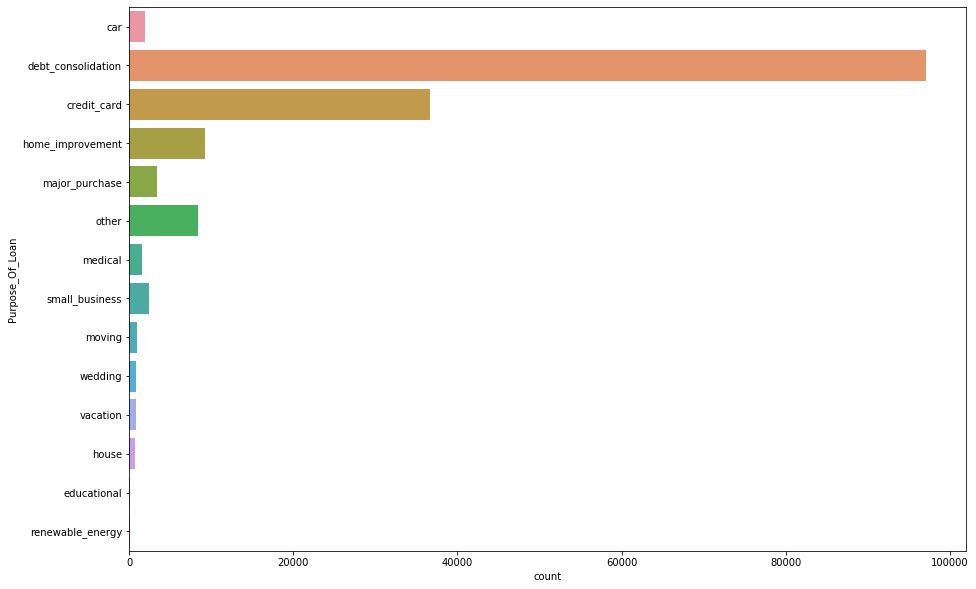

In [16]:
plt.figure(figsize=(15,10))
sns.countplot(y = train.Purpose_Of_Loan)

In [36]:
train.groupby(['Purpose_Of_Loan'])['Loan_Amount_Requested'].describe()

,count,mean,std,min,25%,50%,75%,max
Purpose_Of_Loan,,,,,,,,
car,1885.0,8053.806366,5608.118313,1000.0,4000.0,6000.0,10000.0,35000.0
credit_card,36684.0,14754.313870,7999.013687,725.0,8900.0,13000.0,20000.0,35000.0
debt_consolidation,97101.0,15148.553568,8164.935576,800.0,9000.0,14000.0,20000.0,35000.0
educational,121.0,7110.123967,4871.189300,1000.0,3500.0,6000.0,10000.0,25000.0
home_improvement,9269.0,13867.466825,8834.936431,900.0,7000.0,12000.0,20000.0,35000.0
house,773.0,15042.205692,8731.603527,1000.0,8000.0,13475.0,20950.0,35000.0
major_purchase,3435.0,10394.657933,7929.416404,1000.0,4800.0,8000.0,14000.0,35000.0
medical,1541.0,8913.854640,6923.468955,1000.0,4000.0,6850.0,12000.0,35000.0
moving,974.0,7668.814168,6418.661738,1000.0,3000.0,5375.0,10000.0,35000.0


In [21]:
train.Annual_Income.fillna(value = '73331' , inplace = True)

In [22]:
train.Home_Owner.describe()

count       138960
unique           5
top       Mortgage
freq         70345
Name: Home_Owner, dtype: object

In [23]:
train.Home_Owner.fillna(value = 'Mortgage' , inplace = True)

In [24]:
train.Length_Employed.value_counts()

10+ years    52915
2 years      14620
3 years      12974
< 1 year     12805
5 years      10814
1 year       10422
4 years       9784
7 years       9308
6 years       9094
8 years       7917
9 years       6285
Name: Length_Employed, dtype: int64

In [25]:
train.Length_Employed.fillna(value = '10' , inplace = True)

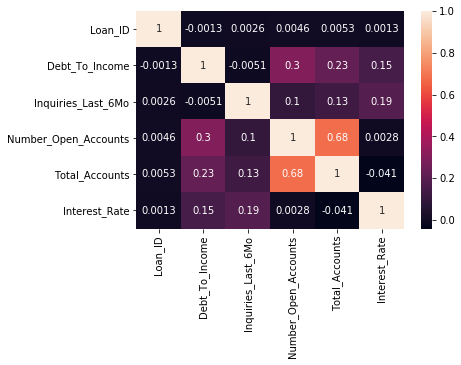

In [26]:
sns.heatmap(train.corr() , annot = True)

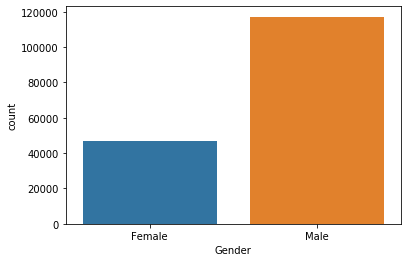

In [27]:
sns.countplot(train.Gender)

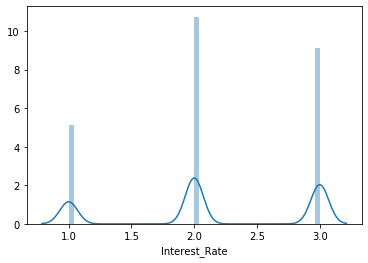

In [28]:
sns.distplot(train.Interest_Rate)

In [32]:
train['Loan_Amount_Requested'] = train['Loan_Amount_Requested'].str.replace(",","")

In [34]:
train['Loan_Amount_Requested'] = train['Loan_Amount_Requested'].astype(int)

In [35]:
train.groupby(['Gender','Length_Employed'])['Loan_Amount_Requested'].describe()

count          mean          std     min     25%  \
Gender Length_Employed                                                       
Female 1 year            3073.0  13329.425643  8013.823477  1000.0  7200.0   
       10                2127.0  11457.052186  7498.449800  1000.0  5700.0   
       10+ years        15153.0  15782.318683  8609.191945  1000.0  9550.0   
       2 years           4148.0  13532.762777  8051.310970  1000.0  7200.0   
       3 years           3660.0  13748.271858  8098.444447  1000.0  8000.0   
       4 years           2812.0  13738.691323  7942.437048   900.0  8000.0   
       5 years           3010.0  13718.330565  8107.579399  1000.0  7800.0   
       6 years           2589.0  14023.541908  8083.974779  1000.0  8000.0   
       7 years           2695.0  14347.968460  8016.946214  1000.0  8000.0   
       8 years           2314.0  14722.850043  8262.710896  1000.0  8000.0   
       9 years           1853.0  14853.035618  8149.179789  1000.0  9000.0   
       < 1 year          3699.0  12976.480130  8063.256371   500.0  6800.0   
Male   1 year            7349.0  13205.946387  7966.924004   725.0  7075.0   
       10                5244.0  11507.732647  7426.909446  1000.0  6000.0   
       10+ years        37762.0  15807.336079  8582.353806  1000.0  9600.0   
       2 years          10472.0  13615.593965  8074.483692   800.0  7500.0   
       3 years           9314.0  13680.279686  7977.605719   500.0  8000.0   
       4 years           6972.0  13730.887837  7985.397669  1000.0  8000.0   
       5 years           7804.0  13902.040620  8018.028668  1000.0  8000.0   
       6 years           6505.0  14134.926979  7972.693751  1000.0  8000.0   
       7 years           6613.0  14476.996068  8090.344480  1000.0  8225.0   
       8 years           5603.0  14432.495984  8082.284182  1000.0  8000.0   
       9 years           4432.0  14849.706679  8104.768976  1000.0  8875.0   
       < 1 year          9106.0  13112.277619  8066.689451   500.0  7000.0   

                            50%       75%      max  
Gender Length_Employed                              
Female 1 year           12000.0  18000.00  35000.0  
       10               10000.0  15000.00  35000.0  
       10+ years        15000.0  21000.00  35000.0  
       2 years          12000.0  18000.00  35000.0  
       3 years          12000.0  18350.00  35000.0  
       4 years          12000.0  18825.00  35000.0  
       5 years          12000.0  18000.00  35000.0  
       6 years          12000.0  19200.00  35000.0  
       7 years          12525.0  19725.00  35000.0  
       8 years          13250.0  20000.00  35000.0  
       9 years          13500.0  20000.00  35000.0  
       < 1 year         11000.0  18000.00  35000.0  
Male   1 year           11400.0  18000.00  35000.0  
       10               10000.0  15106.25  35000.0  
       10+ years        15000.0  21000.00  35000.0  
       2 years          12000.0  18250.00  35000.0  
       3 years          12000.0  18000.00  35000.0  
       4 years          12000.0  18500.00  35000.0  
       5 years          12000.0  19000.00  35000.0  
       6 years          12000.0  19550.00  35000.0  
       7 years          12800.0  20000.00  35000.0  
       8 years          12800.0  20000.00  35000.0  
       9 years          13437.5  20000.00  35000.0  
       < 1 year         11200.0  18000.00  35000.0

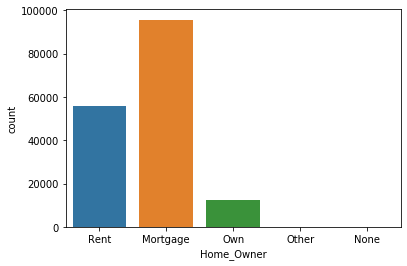

In [31]:
sns.countplot(train.Home_Owner)

In [37]:
train.groupby(['Purpose_Of_Loan'])['Interest_Rate'].describe()

,count,mean,std,min,25%,50%,75%,max
Purpose_Of_Loan,,,,,,,,
car,1885.0,1.881167,0.754105,1.0,1.0,2.0,2.0,3.0
credit_card,36684.0,1.963635,0.733597,1.0,1.0,2.0,3.0,3.0
debt_consolidation,97101.0,2.211501,0.720820,1.0,2.0,2.0,3.0,3.0
educational,121.0,1.743802,0.540508,1.0,1.0,2.0,2.0,3.0
home_improvement,9269.0,2.111231,0.755238,1.0,2.0,2.0,3.0,3.0
house,773.0,2.333765,0.759984,1.0,2.0,3.0,3.0,3.0
major_purchase,3435.0,1.984862,0.773997,1.0,1.0,2.0,3.0,3.0
medical,1541.0,2.347177,0.717707,1.0,2.0,2.0,3.0,3.0
moving,974.0,2.452772,0.704797,1.0,2.0,3.0,3.0,3.0


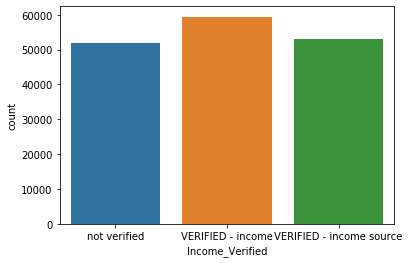

In [38]:
sns.countplot(train.Income_Verified)

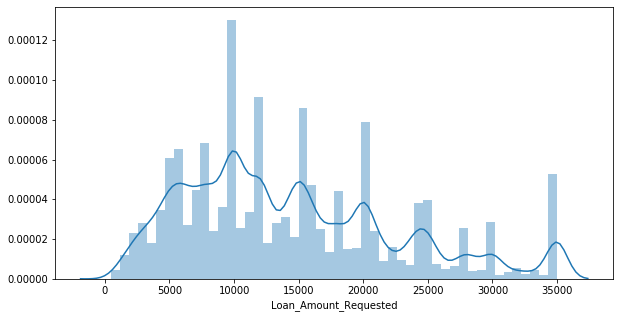

In [39]:
plt.figure(figsize=(10,5))
sns.distplot(train['Loan_Amount_Requested'])

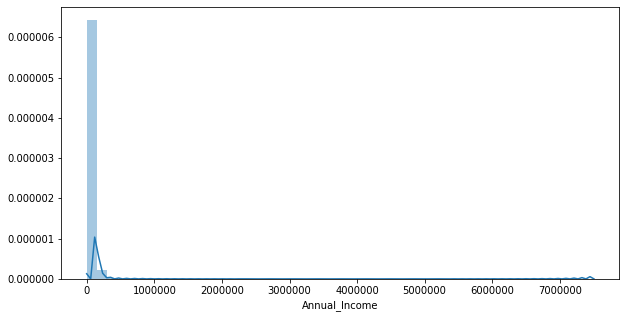

In [40]:
plt.figure(figsize=(10,5))
sns.distplot(train.Annual_Income)

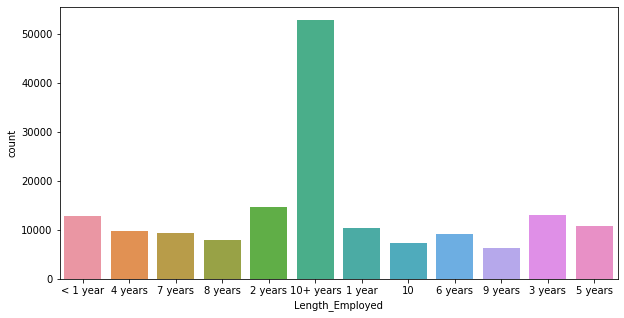

In [41]:
plt.figure(figsize=(10,5))
sns.countplot(train['Length_Employed'])

In [42]:
train.corr().Interest_Rate   # corelationship with traget variable i.e interest rate.

Loan_ID                  0.001290
Loan_Amount_Requested    0.132486
Debt_To_Income           0.152472
Inquiries_Last_6Mo       0.188987
Number_Open_Accounts     0.002847
Total_Accounts          -0.040690
Interest_Rate            1.000000
Name: Interest_Rate, dtype: float64

In [43]:
train['Length_Employed']= train['Length_Employed'].str.replace("<","")

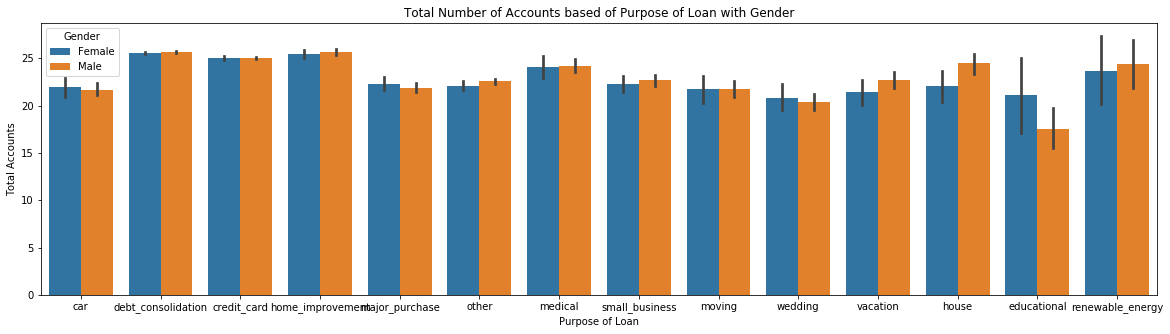

In [45]:
plt.figure(figsize=(20,5))
sns.barplot(y = "Total_Accounts",x = "Purpose_Of_Loan",data = train,hue = "Gender")
plt.xlabel("Purpose of Loan")
plt.ylabel("Total Accounts")
plt.title("Total Number of Accounts based of Purpose of Loan with Gender")
plt.show()

In [46]:
newtrain = train.drop(['Loan_ID','Length_Employed'],axis= 1)

In [56]:
test.isnull().sum()

Loan_ID                  0
Loan_Amount_Requested    0
Length_Employed          0
Home_Owner               0
Annual_Income            0
Income_Verified          0
Purpose_Of_Loan          0
Debt_To_Income           0
Inquiries_Last_6Mo       0
Number_Open_Accounts     0
Total_Accounts           0
Gender                   0
dtype: int64

In [48]:
test.Annual_Income.fillna(value = "73485",inplace = True)

In [49]:
test.Home_Owner.fillna(value = 'Mortgage',inplace = True)
test.Length_Employed.fillna(value= '11',inplace = True)


In [50]:
test.drop("Months_Since_Deliquency",axis=1,inplace = True)

In [51]:
newtest = test.drop(['Loan_ID',"Length_Employed"],axis = 1)

In [54]:
label = LabelEncoder()

In [55]:
newtest['Home_Owner'] = label.fit_transform(newtest.Home_Owner)
newtest['Income_Verified'] = label.fit_transform(newtest.Income_Verified)
newtest['Purpose_Of_Loan'] = label.fit_transform(newtest.Purpose_Of_Loan)
newtest['Gender'] = label.fit_transform(newtest.Gender)

In [57]:
newtrain = train.drop(['Loan_ID','Length_Employed'],axis= 1)



In [65]:
newtrain['Gender'] = label.fit_transform(newtrain.Gender)
newtrain['Home_Owner'] = label.fit_transform(newtrain.Home_Owner)
newtrain['Purpose_Of_Loan'] = label.fit_transform(newtrain.Purpose_Of_Loan)
newtrain['Income_Verified'] = label.fit_transform(newtrain.Income_Verified)

In [58]:
newtest['Loan_Amount_Requested'] = newtest.Loan_Amount_Requested.str.replace(",","")

In [59]:
print(newtrain.shape)
print(newtest.shape)

(164309, 11)
(109541, 10)


In [60]:
sc = StandardScaler()
scaled_test = pd.DataFrame(sc.fit_transform(newtest),columns = newtest.columns)

In [68]:
y = newtrain.Interest_Rate
x = newtrain.drop('Interest_Rate',axis = 1)

In [69]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
model = dtree.fit(x,y)

In [70]:
pre = model.predict(scaled_test)

In [71]:
sol = pd.DataFrame({'Loan_Id':test.Loan_ID,"Interest":pre})

In [72]:
sol.head()

,Loan_Id,Interest
0,10164310,3
1,10164311,3
2,10164312,2
3,10164313,3
4,10164314,3


In [74]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
model= rf.fit(x,y)
predctions = model.predict(scaled_test)
predctions

array([3, 2, 2, ..., 2, 3, 3], dtype=int64)

In [77]:
rfsol = pd.DataFrame({'Loan_status':test.Loan_ID,"Interest":predctions})

In [80]:
rfsol.head(sns.barplot(y = nr.columns,x = rf.feature_importances_))

,Loan_status,Interest
0,10164310,3
1,10164311,2
2,10164312,2
3,10164313,3
4,10164314,2


In [81]:
## finding the feature importancerf.feature_importances_

In [82]:
rf.feature_importances_

array([0.17043508, 0.02816607, 0.16853108, 0.0291793 , 0.04595241,
       0.21580833, 0.03494142, 0.12868747, 0.15148193, 0.02681692])

In [83]:
nr = newtrain.drop("Interest_Rate",axis = 1)

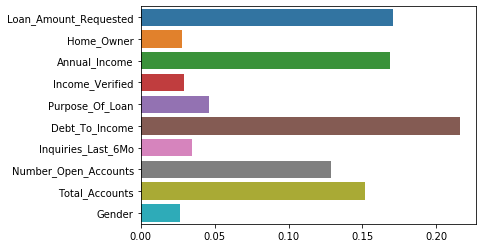

In [84]:
sns.barplot(y = nr.columns,x = rf.feature_importances_)